# Heart Disease Prediction

### Importing libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Importing Our Dataset

In [3]:
dataset = pd.read_csv("heart.csv")

### Understanding our dataset

In [4]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.shape

(303, 14)

In [119]:
dataset['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 13
Float variables: 1


In [10]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


### Train Test Split

In [11]:
x = dataset.drop("target",axis=1)
y = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [12]:
X_train.shape

(242, 13)

In [13]:
X_test.shape

(61, 13)

### Model fitting

#### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [91]:
for i in solvers:
    for j in c_values:
        lr2 = LogisticRegression(solver=i, penalty='l2',  C=j)
        lr2.fit(X_train, Y_train)
        Y_pred_lr2 = lr2.predict(X_test)
        score_lr2 = accuracy_score(Y_pred_lr2,Y_test)*100
        print("The accuracy score achieved using the parameter "+str([i, j])+" is: "+str(score_lr2)+" %")
lr = LogisticRegression(solver='liblinear', penalty='l2', C=0.1)
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

The accuracy score achieved using the parameter ['newton-cg', 100] is: 85.24590163934425 %
The accuracy score achieved using the parameter ['newton-cg', 10] is: 85.24590163934425 %
The accuracy score achieved using the parameter ['newton-cg', 1.0] is: 85.24590163934425 %
The accuracy score achieved using the parameter ['newton-cg', 0.1] is: 85.24590163934425 %
The accuracy score achieved using the parameter ['newton-cg', 0.01] is: 80.32786885245902 %
The accuracy score achieved using the parameter ['lbfgs', 100] is: 85.24590163934425 %
The accuracy score achieved using the parameter ['lbfgs', 10] is: 85.24590163934425 %
The accuracy score achieved using the parameter ['lbfgs', 1.0] is: 85.24590163934425 %
The accuracy score achieved using the parameter ['lbfgs', 0.1] is: 85.24590163934425 %
The accuracy score achieved using the parameter ['lbfgs', 0.01] is: 80.32786885245902 %
The accuracy score achieved using the parameter ['liblinear', 100] is: 83.60655737704919 %
The accuracy score 

In [103]:
score_lr = accuracy_score(Y_pred_lr,Y_test)*100
print(score_lr)

85.24590163934425


#### SVM

In [74]:
from sklearn.svm import SVC
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [92]:
for i in kernel:
    for j in C:
        sv2 = SVC(kernel=i, gamma='scale',  C=j)
        sv2.fit(X_train, Y_train)
        Y_pred_sv2 = sv2.predict(X_test)
        score_sv2 = accuracy_score(Y_pred_sv2,Y_test)*100
        print("The accuracy score achieved using the parameters "+str([i, j])+" is: "+str(score_sv2)+" %")
sv = SVC(kernel='linear', gamma='scale', C=50)
sv.fit(X_train, Y_train)
Y_pred_sv = sv.predict(X_test)

The accuracy score achieved using the parameters ['linear', 50] is: 86.88524590163934 %
The accuracy score achieved using the parameters ['linear', 10] is: 83.60655737704919 %
The accuracy score achieved using the parameters ['linear', 1.0] is: 81.9672131147541 %
The accuracy score achieved using the parameters ['linear', 0.1] is: 83.60655737704919 %
The accuracy score achieved using the parameters ['linear', 0.01] is: 86.88524590163934 %
The accuracy score achieved using the parameters ['poly', 50] is: 78.68852459016394 %
The accuracy score achieved using the parameters ['poly', 10] is: 77.04918032786885 %
The accuracy score achieved using the parameters ['poly', 1.0] is: 72.1311475409836 %
The accuracy score achieved using the parameters ['poly', 0.1] is: 55.73770491803278 %
The accuracy score achieved using the parameters ['poly', 0.01] is: 55.73770491803278 %
The accuracy score achieved using the parameters ['rbf', 50] is: 75.40983606557377 %
The accuracy score achieved using the p

In [104]:
score_sv = accuracy_score(Y_pred_sv,Y_test)*100
print(score_sv)

86.88524590163934


#### KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [90]:
for i in metric:
    for j in weights:
        for k in n_neighbors:
            knn2 = KNeighborsClassifier(n_neighbors=k, metric=i, weights=j)
            knn2.fit(X_train, Y_train)
            Y_pred_knn2 = knn2.predict(X_test)
            score_knn2 = accuracy_score(Y_pred_knn2,Y_test)*100
            print("The accuracy score achieved the parameters "+str([i, j, k])+" is: "+str(score_knn2)+" %")

The accuracy score achieved the parameters ['euclidean', 'uniform', 1] is: 52.459016393442624 %
The accuracy score achieved the parameters ['euclidean', 'uniform', 3] is: 63.934426229508205 %
The accuracy score achieved the parameters ['euclidean', 'uniform', 5] is: 63.934426229508205 %
The accuracy score achieved the parameters ['euclidean', 'uniform', 7] is: 67.21311475409836 %
The accuracy score achieved the parameters ['euclidean', 'uniform', 9] is: 67.21311475409836 %
The accuracy score achieved the parameters ['euclidean', 'uniform', 11] is: 70.49180327868852 %
The accuracy score achieved the parameters ['euclidean', 'uniform', 13] is: 72.1311475409836 %
The accuracy score achieved the parameters ['euclidean', 'uniform', 15] is: 67.21311475409836 %
The accuracy score achieved the parameters ['euclidean', 'uniform', 17] is: 72.1311475409836 %
The accuracy score achieved the parameters ['euclidean', 'uniform', 19] is: 70.49180327868852 %
The accuracy score achieved the parameters [

In [105]:
knn = KNeighborsClassifier(n_neighbors=15, metric='manhattan', weights='distance')
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
score_knn = accuracy_score(Y_pred_knn,Y_test)*100
print(score_knn)

73.77049180327869


#### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

In [99]:
for i in max_features:
    for j in n_estimators:
        rf2 = RandomForestClassifier(n_estimators=j, max_features=i)
        rf2.fit(X_train, Y_train)
        Y_pred_rf2 = rf2.predict(X_test)
        score_rf2 = accuracy_score(Y_pred_rf2,Y_test)*100
        print("The accuracy score achieved using the parameter "+str([i, j])+" is: "+str(score_rf2)+" %")

The accuracy score achieved using the parameter ['sqrt', 10] is: 83.60655737704919 %
The accuracy score achieved using the parameter ['sqrt', 100] is: 85.24590163934425 %
The accuracy score achieved using the parameter ['sqrt', 1000] is: 85.24590163934425 %
The accuracy score achieved using the parameter ['log2', 10] is: 83.60655737704919 %
The accuracy score achieved using the parameter ['log2', 100] is: 85.24590163934425 %
The accuracy score achieved using the parameter ['log2', 1000] is: 86.88524590163934 %


In [96]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

323


In [109]:
score_rf = accuracy_score(Y_pred_rf,Y_test)*100
print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.1639344262295 %


In [108]:
rf2 = RandomForestClassifier(n_estimators=100, max_features='log2', random_state=323)
rf2.fit(X_train,Y_train)
Y_pred_rf2 = rf2.predict(X_test)
score_rf2 = accuracy_score(Y_pred_rf2,Y_test)*100
print(score_rf2)

90.1639344262295


### Final Output

In [110]:
scores = [score_lr,score_sv,score_knn,score_rf]
algorithms = ["Logistic Regression","SVM Algorithm","KNN Algorithm","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.24590163934425 %
The accuracy score achieved using SVM Algorithm is: 86.88524590163934 %
The accuracy score achieved using KNN Algorithm is: 73.77049180327869 %
The accuracy score achieved using Random Forest is: 90.1639344262295 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

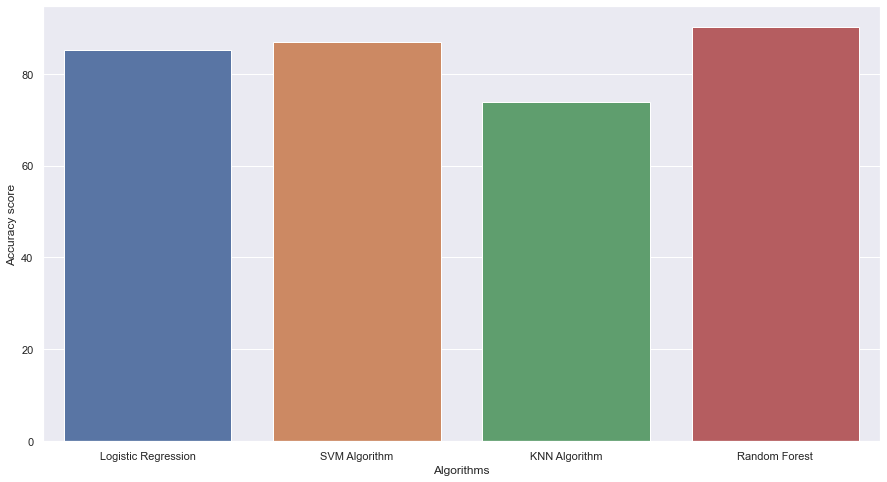

In [111]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [ ]:
# import pickle
# with open('model_rf', 'wb') as files:
#     pickle.dump(rf,files)